CS 4375 Intro to Machine Learning

**Objectives: **

* Gain experience with machine learning 
in sklearn on a small data set
* Compare experience in R versus sklear

NOTE: Please adjust the path of Auto.csv before you run this colab.

**1.**

In [36]:
# import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import tensorflow as tf


# Read the CSV file from the location using pandas
df_auto = pd.read_csv("Auto.csv")

# Output the first 5 rows of the data
print("First few rows of Auto:")
print(df_auto.head())

# Output the dimensions of the data
print("Dimensions of Auto dataframe:", df_auto.shape)


First few rows of Auto:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Dimensions of Auto dataframe: (392, 9)


**2.**

In [37]:
# Use describe() on the mpg, weight, and year columns
print("Exploratory data analysis on mpg, weight, and year columns:")
print(df_auto[['mpg', 'weight', 'year']].describe())

# Comments indicating the range and average of each column:
print("\nComments:")
print("- The mpg column ranges from {:.2f} to {:.2f} with an average of {:.2f}.".format(df_auto['mpg'].min(), df_auto['mpg'].max(), df_auto['mpg'].mean()))
print("- The weight column ranges from {:.2f} to {:.2f} with an average of {:.2f}.".format(df_auto['weight'].min(), df_auto['weight'].max(), df_auto['weight'].mean()))
print("- The year column ranges from {} to {} with an average of {:.2f}.".format(df_auto['year'].min(), df_auto['year'].max(), df_auto['year'].mean()))


Exploratory data analysis on mpg, weight, and year columns:
              mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000

Comments:
- The mpg column ranges from 9.00 to 46.60 with an average of 23.45.
- The weight column ranges from 1613.00 to 5140.00 with an average of 2977.58.
- The year column ranges from 70.0 to 82.0 with an average of 76.01.


**3.**

In [38]:
# check data types of all columns
print(df_auto.dtypes)

# convert cylinders to categorical data type and assign codes
df_auto['cylinders'] = df_auto['cylinders'].astype('category').cat.codes

# convert origin to categorical data type
df_auto['origin'] = df_auto['origin'].astype('category')

# verify the changes with the dtypes attribute
print(df_auto.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object
mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


**4.**

In [39]:
# Delete rows with NAs
auto_df = df_auto.dropna()

# Output new dimensions of the data
print("New dimensions after NAs drop:", auto_df.shape)


New dimensions after NAs drop: (389, 9)


**5.**

In [40]:
# Create new column 'mpg_high' based on average mpg
avg_mpg = auto_df['mpg'].mean()
auto_df['mpg_high'] = (auto_df['mpg'] > avg_mpg).astype(int).astype('category')

# Delete 'mpg' and 'name' columns
auto_df.drop(['mpg', 'name'], axis=1, inplace=True)

# Output the first few rows of the modified dataframe
print(auto_df.head())


   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  


<ipython-input-40-d21146ba804d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df['mpg_high'] = (auto_df['mpg'] > avg_mpg).astype(int).astype('category')
<ipython-input-40-d21146ba804d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df.drop(['mpg', 'name'], axis=1, inplace=True)


**6.**

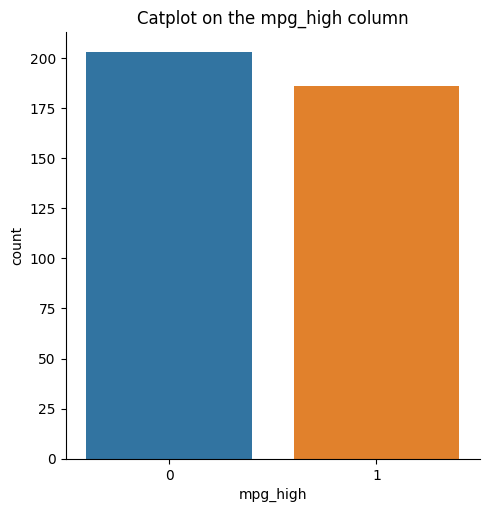

In [41]:
# a. Seaborn catplot on the mpg_high column
sns.catplot(x='mpg_high', kind='count', data=auto_df).set(title='Catplot on the mpg_high column')


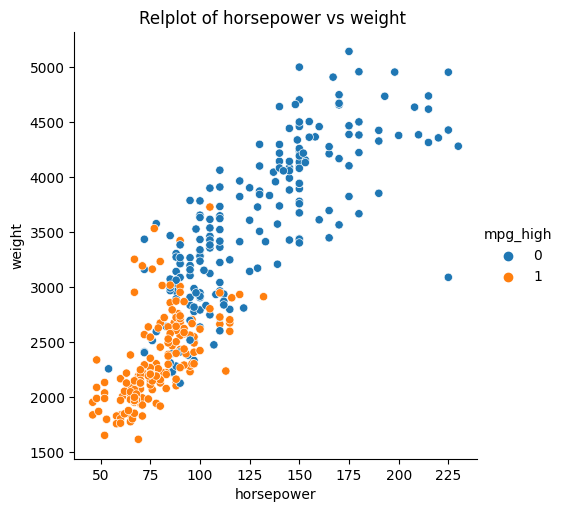

In [42]:
# b. Seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue or style to mpg_high
sns.relplot(x='horsepower', y='weight', hue='mpg_high', data=auto_df).set(title='Relplot of horsepower vs weight ')



[Text(0.5, 1.0, 'Boxplot of mpg_high vs weight')]

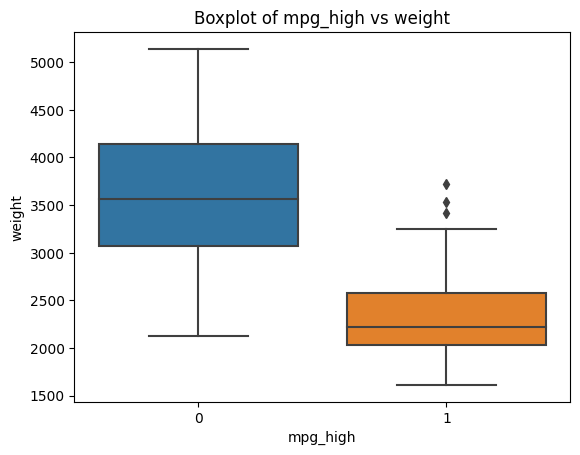

In [43]:
# c. Seaborn boxplot with mpg_high on the x axis and weight on the y axis
sns.boxplot(x='mpg_high', y='weight', data=auto_df).set(title='Boxplot of mpg_high vs weight')

d.

a. The catplot demonstrates that the data is fairly *evenly* distributed between vehicles with high and low mpg.

b. The relplot demonstrates that high and low mpg cars may be easily distinguished based on horsepower and weight. Cars with high mpg typically weigh less and have fewer horsepower than those with low mpg.

c. According to the boxplot, high-mpg vehicles typically weigh less than low-mpg vehicles, with less weight variation within the high-mpg group.

**7.**

In [44]:
# setting seed
seed = 1234

# split into train/test with 80/20 ratio
train, test = train_test_split(auto_df, test_size=0.2, random_state=seed)
X_train= train.drop('mpg_high', axis=1)
X_test = test.drop('mpg_high', axis=1)
y_train = train['mpg_high']
y_test = test['mpg_high']

# output dimensions
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)


Train dimensions: (311, 8)
Test dimensions: (78, 8)


**8.**

In [45]:
# train a logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# test the model and evaluate the performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**9.**

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



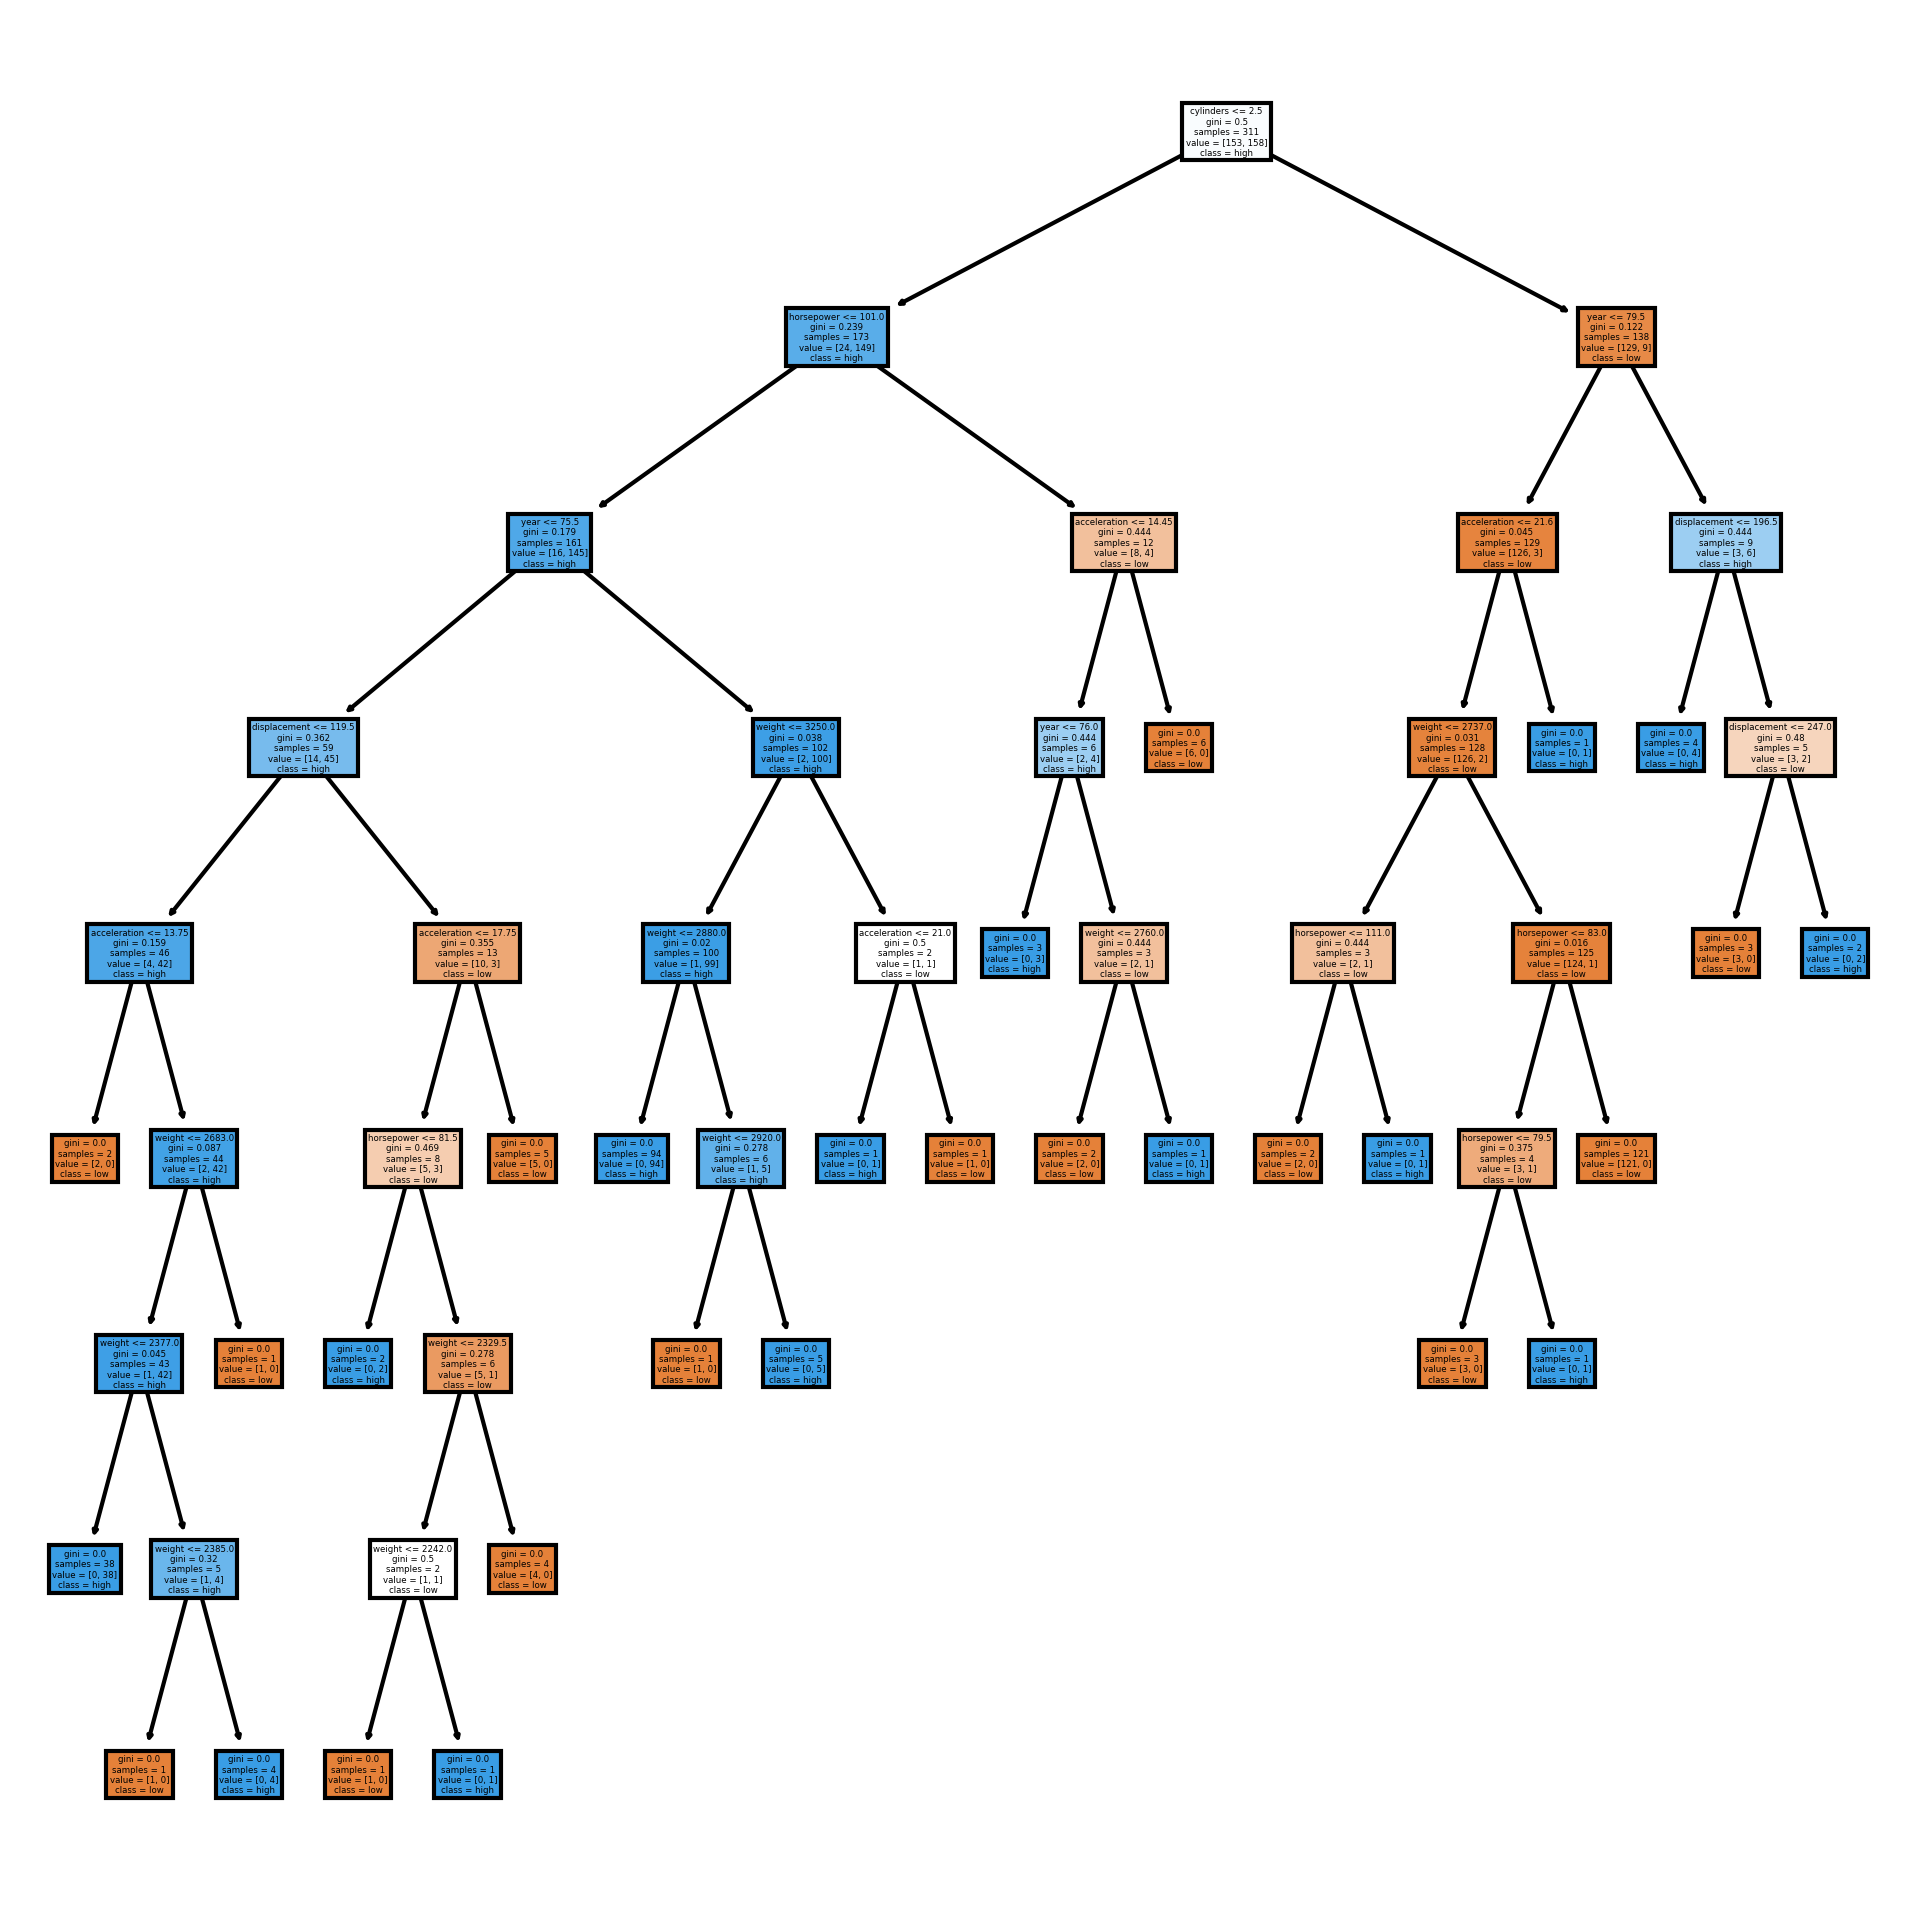

In [46]:
# Train the decision tree
dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)

# Test and evaluate decision tree
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=300)
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=["low", "high"], ax=axes)
plt.show()


**10.**

In [47]:

# Define the first network topology
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model using binary crossentropy loss and accuracy as the metric
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test data
y_pred1 = model1.predict(X_test)
y_pred1 = [1 if i > 0.5 else 0 for i in y_pred1]
print("Classification Report for Model 1:\n", classification_report(y_test, y_pred1))

# Define the second network topology
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model using binary crossentropy loss and accuracy as the metric
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate the model on the test data
y_pred2 = model2.predict(X_test)
y_pred2 = [1 if i > 0.5 else 0 for i in y_pred2]
print("Classification Report for Model 2:\n", classification_report(y_test, y_pred2))


3/3 [==============================] - 0s 3ms/step
Classification Report for Model 1:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        50
           1       0.76      1.00      0.86        28

    accuracy                           0.88        78
   macro avg       0.88      0.91      0.88        78
weighted avg       0.91      0.88      0.89        78

3/3 [==============================] - 0s 4ms/step
Classification Report for Model 2:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.75      0.96      0.84        28

    accuracy                           0.87        78
   macro avg       0.86      0.89      0.87        78
weighted avg       0.89      0.87      0.87        78



In this demonstration, two neural networks are trained using various settings and topologies.

Model 1 has two hidden layers with 32 and 16 nodes, respectively. Using accuracy and binary crossentropy loss as the metrics, we build both models.

 While Model 2 has three hidden layers with 64, 32, and 16 nodes each along with a 20% dropout layer, 

With a batch size of 32 and a validation split of 0.2, we train Model 1 for 50 epochs, and Model 2 for 100 epochs, with a batch size of 64 and a validation split of 0.2. We test both models on the test data after training, and then we output the classification report metrics.


Finally, we may assess how both models performed and try to determine why they did or did not. We found out that the accuracy output was similar by both models i.e. 88 and 87 percentage respectively, which may differ in next training. I think the number of hidden layers, number of nodes per layer, dropout layers, activation functions employed, learning rate, batch size, etc. are a few variables that could account for the performance discrepancy. To find the ideal configuration for our data and problem, we can experiment with various topologies and settings.




**11.**

a. In my case, Decision Tree algorithm performed better than other.

b.

Reports:

**Logistic Regression:**

Accuracy: 86%

Recall: 96%

Precision: 73%

**Decision Tree:**

Accuracy: 92%

Recall: 93%

Precision: 87%

**Neural Network (Model 1):**

Accuracy: 88%

Recall: 100%

Precision: 76%'

**Neural Network (Model 2):**

Accuracy: 87%

Recall: 96%

Precision: 75%

c.

Logistic regression presumes a linear relationship between features and the outcome variable, but decision trees and neural network are noted for their capacity to capture complicated interactions between features. This might account for why the decision tree approach outperforms logistic regression, while neural networks have similar performance to that of decision tress.

d.

Sklearn is a Python package for machine learning, whereas R is a popular computer language for statistical computing and graphics.Python is more frequently used for machine learning and data analysis, while R offers a greater selection of statistical analytic tools and packages. The decision between R and Python may ultimately come down to personal preference, as each language has advantages and disadvantages so in my familiarity and preference I find using python easy as I have played with python more than R.





